# BORA automatic visualization pipeline.

## Introduction


<center>Laziness is the first step torwards efficiency</center>

This groups main focus is the design and implementation of a library, possibly a GUI, for the  BORA Adriatic Marine Forecast company based in Zagreb Croatia. Bulk of the work of the company is based on numerical modeling of atmospheric and marine conditions in order to forecast metheorogical parameters in Croatia and the sorrounding region. The applied high quality numerical models are adaptable for prediction of various other related phoenomena, such as oil spill trajectory prediction for contingency planning and pollution response<sup>[1]</sup>. 

The main motivation behind this task are the current <sub>horrendeous</sub> working practices, lack of a consistent visualization library and hopes that by providing one such library one would lift the veil of mystery behind the complicated nature of climate, climate models, climate variables codependency and human-climate interactions. Providing one such visualisation library would enable the exploratory insight into numerical data unhindered by the coding challenges currently present during the visualisation process.

[1] https://www.gekom.hr/picz/Poster_Oil_Spill.pdf

## Domain Problem Characterization

<center>It is an excellent habit to look at things as so many symbols.</center>

The library is obviously intended for the purposes of the more expertised user as for the full understanding of data one should understand the theory and the implementation of the models used to obtain the data. However, one has to keep in mind that with simplified visualisation the data avails itself to the more unknowledgable user in which cases all precautions to communicate any potential uncertainties must be taken. 

Exploratory nature and the abundance of modeling parameters require, at least, a near real-time visualization. Depending on the particular simulation used, this could and could not be a problem. The expected maximal data size, based on the data sizes of results produced by current simulations, is in the range of 1-4GB per tile. Multiple tiles encompas a single geographic region and larger geographic regions are encompassed with several such tile groups. This neccessitates the ability of displaying, or aggregating, the data from several tiles simulataneously. The tile data is stored as a NetCDF file which seems to be a popular choice among the climate scientists. Ability to export parts or the whole data in different formats including csv, user-specified ascii, hdf5 and others.

The current domain vocabulary is well established and widely accepted and there seems to be very little to no variation in the data type used for the parameters recorded by the simulations. There do not seem to be a commonly used data analysis, visualisation and verification procedures.

By using interviewing techniques we have extracted the intricate details of the current work process in GEKOM. The currently used programing language is Python. Python modules matplotlib with basemap toolking and netCDF4 are used to visualise the data. All visualisation is done with separate python scripts that have to be changed every time another visualisation or change to an existing visualisation has to be done. Often this consists of copy-pasting existing scripts and re-running them. netCDF4 module is also very unintuitive as it represents the data as a python dictionary keys which necessitates prior intimate knowledge of the data and does not allow autocompletion which reduces the exploratory potential for the end user. The map visualisations are done with basemap module where the land and border information is often additionally supplemented with shapefile data. Time data plots are made by multiple visualisations produced from a for loop and merged in an animation. 

Once the data is visualized it is verified by numerical comparison with existing measuraments per parameter. The data is then further analyzed per purpose level often neccessitating further access to the low-level data. 

The metheorogical data describes various parameters such as: position, temperature, height, pressure, wind (sea currents) velocities, humidity, time etc... Majority of the data is dependent on the position, height and time at least implicitly. Temperature values for different heights do not have to correspond to the same values over another position or the same position at different time of day. In that way it could be more practical to consider the time, height and position as a categorical as well as qualitative data type in the sense that user would be enabled to visualize several T-h values in a single graph by selecting different positions, heights or times.

Of special interest among this data are the velocity values. They are stored as a vector in 3D space therefore special attention needs to be directed torwards making sure that the data displayed is either the vector magnitude, one of the components or some other mapping $f(x_1, x_2, x_3) \rightarrow {\Bbb R}$. 

Another special interest are data displayed by the position values. It is possible to remove the dependancy degeneracy of the data on position by displaying it on a map. The dependance on time and height still remains, but in this case it is not as easy to display uncertainty and depending on the simulation grid/mesh density the visualisation may be outright missleading. If the simulation operator has made a mistake and has run the simulation with a fixed witdh mesh of large enough dimensions it is not unimaginable that one data point could be located on one side of a geological object capable of altering the observed parameters and the other one at the opposite side of the aforementioned object. In that case displaying a surf, heatmap or some other plot that uses interpolation to fill in the missing data will not display the drastic change in the affected parameter. In example, if we measure the temperature values in a simulation with a widely spaced grid it is not unimaginable that in regions with lot of steep mountain peaks some of them will not be covered even though the temperature could vary drastically between the mountain peek and its base. When it comes to map displayed data there seems to be a special need directed torwards displaying gradient data. This is very obvious when looking at the current visualisations used for pressure, wind and current velocities.

. The top level is to characterize the problems and data
of a particular domain, the next level is to map those into abstract op-
erations and data types, the third level is to design the visual encoding
and interaction to support those operations, and the innermost fourth
level is to create an algorithm to carry out that design automatically
and efficiently. 

## Data and Operation Abstraction

<center>Abstraction can provide stumbling blocks for people of strange intelligence.</center>

The current data types and abstraction seems to be well defined and accepted when it comes to climate model parameter abstraction. However, the end complete result dataset is poorly handled. There are several files, all of which duplicate the position, time and height (depth) data and usually have only a couple of measured parameters. This should be scrapped and efforts should be invested into unifying all of the data contained in a tile to enable the best compression ratios as well as intuitive interface design capable of a real-time visualisations.

The separation of the data into tiles seems to be widely accepted sollution and should be kept, however further research should be devoted to see if the filenames and data-tiles are properly sorted, searchable and enable easy browsing. Special attention should be devoted to enable users to easily browse and find neighbouring tiles from large lists. Perhaps `find_neighbouring_tile`, `display_neighbouring_tiles` functionality?

The current visualisation workflow should be completely scrapped and redone. Special attention should be devoted to designing an interface that respects the DRY principle and removes the majority of repetitive work from the user. Therefore the interface should include the ability to plot majority of commonly used plots in a single line thus removing the current basemap and netCDF interfaces from the user. Additionally, generic plotting functionality should be present enabling the user to plot any combination of variables desired mapped to the availible visualisation channels. 

Because of the flexibility of the used simulation models, the data verification has to remain a flexible process. Therefore there should be an access vector to the original data that does not make that task too cumbersome for the current users.

## Visual Encoding and Interaction Design

<center> It's much easier to consume the visual image than to read something.</center>


|             | Temperature                                                                         | Height                                             | Speed                            | Pressure      | Humidity |
|-------------|-------------------------------------------------------------------------------------|----------------------------------------------------|----------------------------------|---------------|----------|
| Temperature |                                                                                     |                                                    |                                  |               |          |
| Height      | Scatter, Line                                                                       |                                                    |                                  |               |          |
| Speed       | 3 Components selection Absolute vector magnitude User-defined mapping Scatter, Line | Surf plots? Vector quantities as  arrows (2 or 3?) |                                  |               |          |
| Pressure    | Scatter, Line Shared axes for indepen- dent variables?                              | Scatter, Line                                      | Vector quantities? Scatter, Line |               |          |
| Humidity    | Scatter, Line                                                                       | Scatter, Line                                      | Vector quantities? Scatter, Line | Scatter, Line |          |

In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [6]:
a = h5py.File("/home/dino/Desktop/2_zcor4.nc")
a.keys()

[u'y',
 u'one',
 u'depth',
 u'mesh',
 u'time',
 u'nele',
 u'nface',
 u'nv',
 u'node',
 u'sigma_theta_b',
 u'sigma_h_c',
 u'sigma_maxdepth',
 u'ele',
 u'Cs',
 u'zcor',
 u'sigma_theta_f',
 u'sigma',
 u'x']

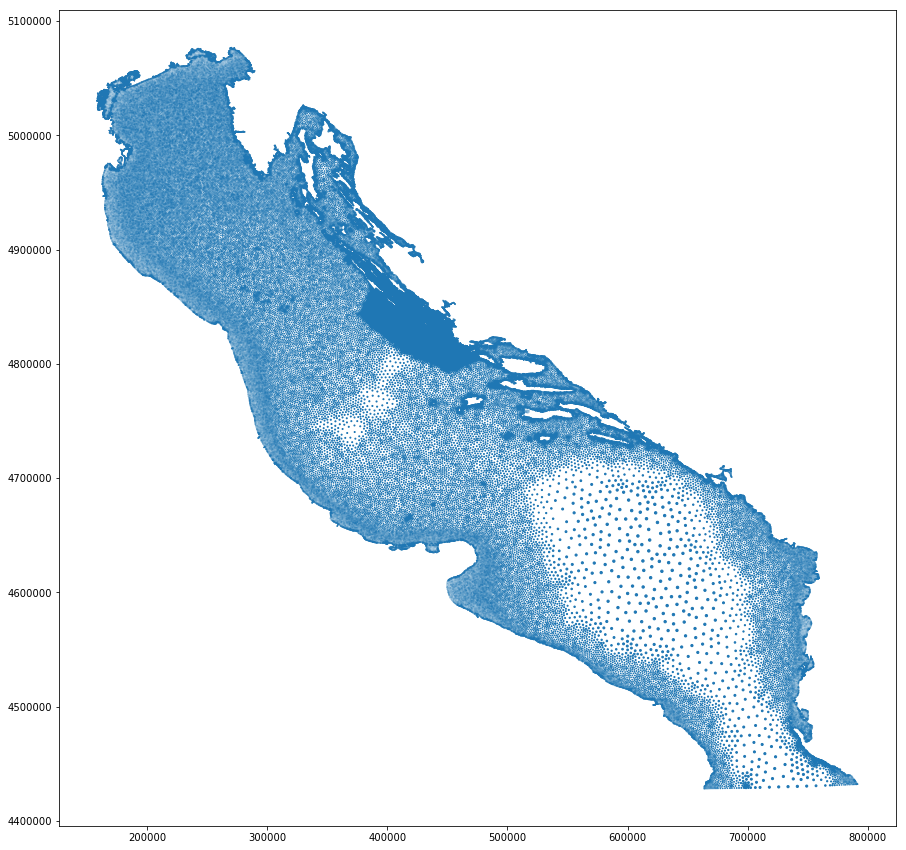

In [7]:
plt.figure(figsize=(15, 15))
plt.scatter(a["x"], a["y"], s=np.multiply(a["depth"], 1/200.))
plt.show()

In [50]:
for key in a.keys():
    print a[key]
24*33

<HDF5 dataset "y": shape (184041,), type "<f4">
<HDF5 dataset "one": shape (1,), type ">f4">
<HDF5 dataset "depth": shape (184041,), type "<f4">
<HDF5 dataset "mesh": shape (), type "<i4">
<HDF5 dataset "time": shape (24,), type "<f4">
<HDF5 dataset "nele": shape (326313,), type ">f4">
<HDF5 dataset "nface": shape (3,), type ">f4">
<HDF5 dataset "nv": shape (33,), type ">f4">
<HDF5 dataset "node": shape (184041,), type ">f4">
<HDF5 dataset "sigma_theta_b": shape (1,), type "<f4">
<HDF5 dataset "sigma_h_c": shape (1,), type "<f4">
<HDF5 dataset "sigma_maxdepth": shape (1,), type "<f4">
<HDF5 dataset "ele": shape (326313, 3), type "<i4">
<HDF5 dataset "Cs": shape (33,), type "<f4">
<HDF5 dataset "zcor": shape (24, 33, 184041), type "<f4">
<HDF5 dataset "sigma_theta_f": shape (1,), type "<f4">
<HDF5 dataset "sigma": shape (33,), type "<f4">
<HDF5 dataset "x": shape (184041,), type "<f4">


792

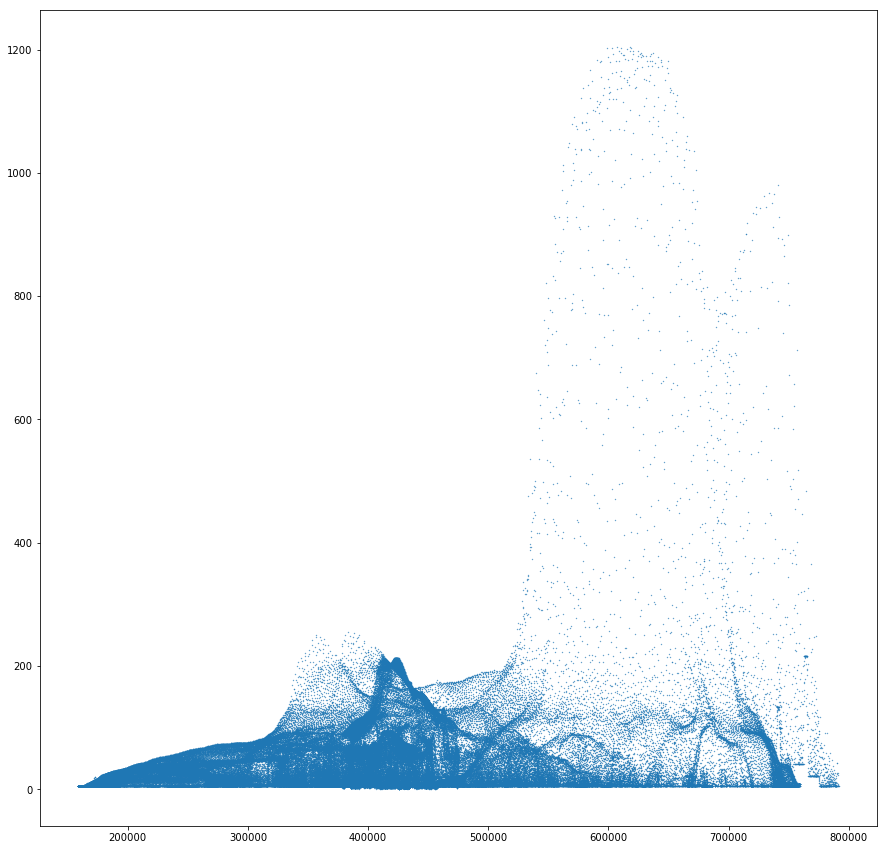

In [15]:
plt.figure(figsize=(15, 15))
plt.scatter(a["x"], a["depth"], s=0.1)
plt.show()